----------------------

In [ ]:
# Importación de librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import shapiro
import pylab

import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as smf
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
# Acceso y muestra del dataset

url = 'https://raw.githubusercontent.com/plotly/datasets/master/mtcars.csv'

df=pd.read_csv(url)
print(df.shape)
df.head()

(32, 12)


,manufacturer,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
# Restringimos a las variables numéricas

numeric_cols=['mpg','disp','hp','drat','wt','qsec']
data=df[numeric_cols]

data.head()

,mpg,disp,hp,drat,wt,qsec
0,21.0,160.0,110,3.90,2.620,16.46
1,21.0,160.0,110,3.90,2.875,17.02
2,22.8,108.0,93,3.85,2.320,18.61
3,21.4,258.0,110,3.08,3.215,19.44
4,18.7,360.0,175,3.15,3.440,17.02


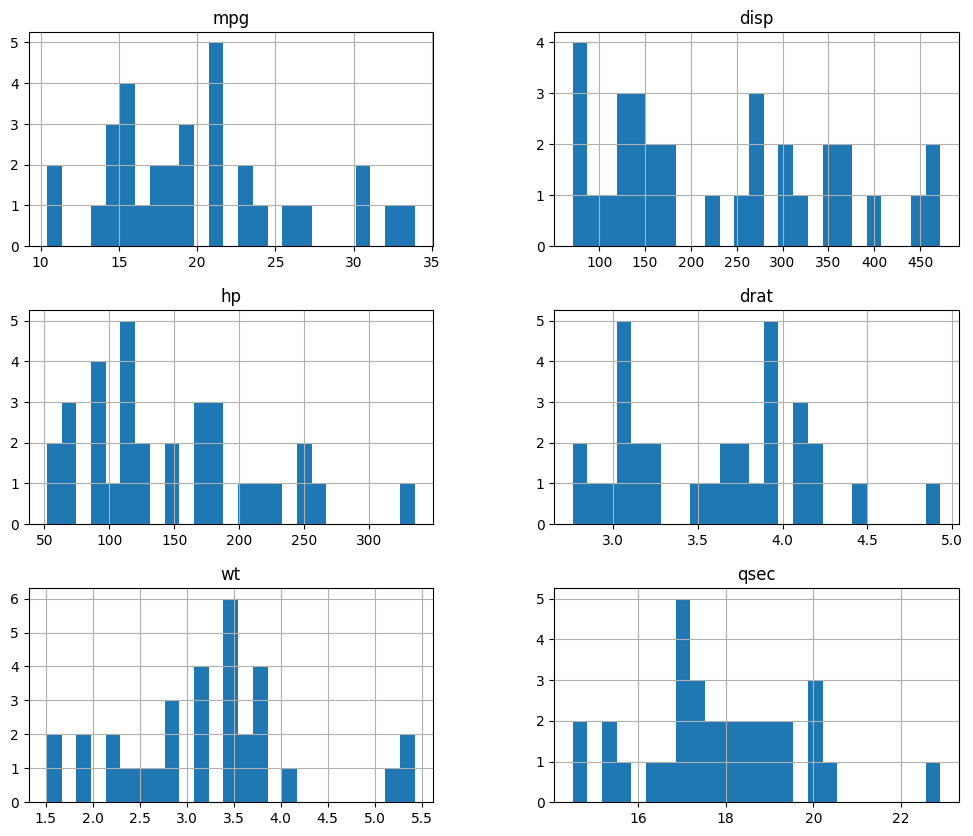

In [ ]:
# Visualizamos distribuciones con histogramas

data.hist(bins=25,figsize=(12,10))
plt.show()

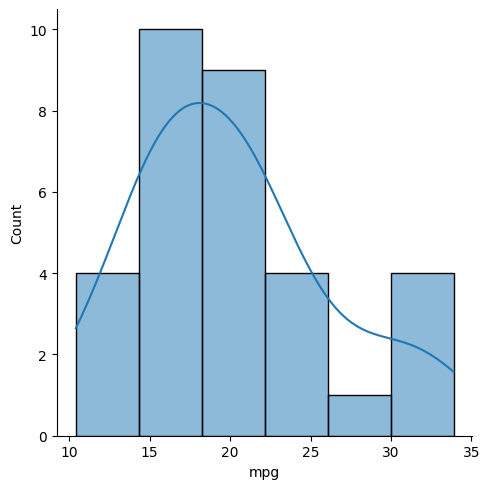

In [ ]:
# Veamos histograma con curva normal de la variable "mpg"
sns.displot(data['mpg'],kde=True)
plt.show()

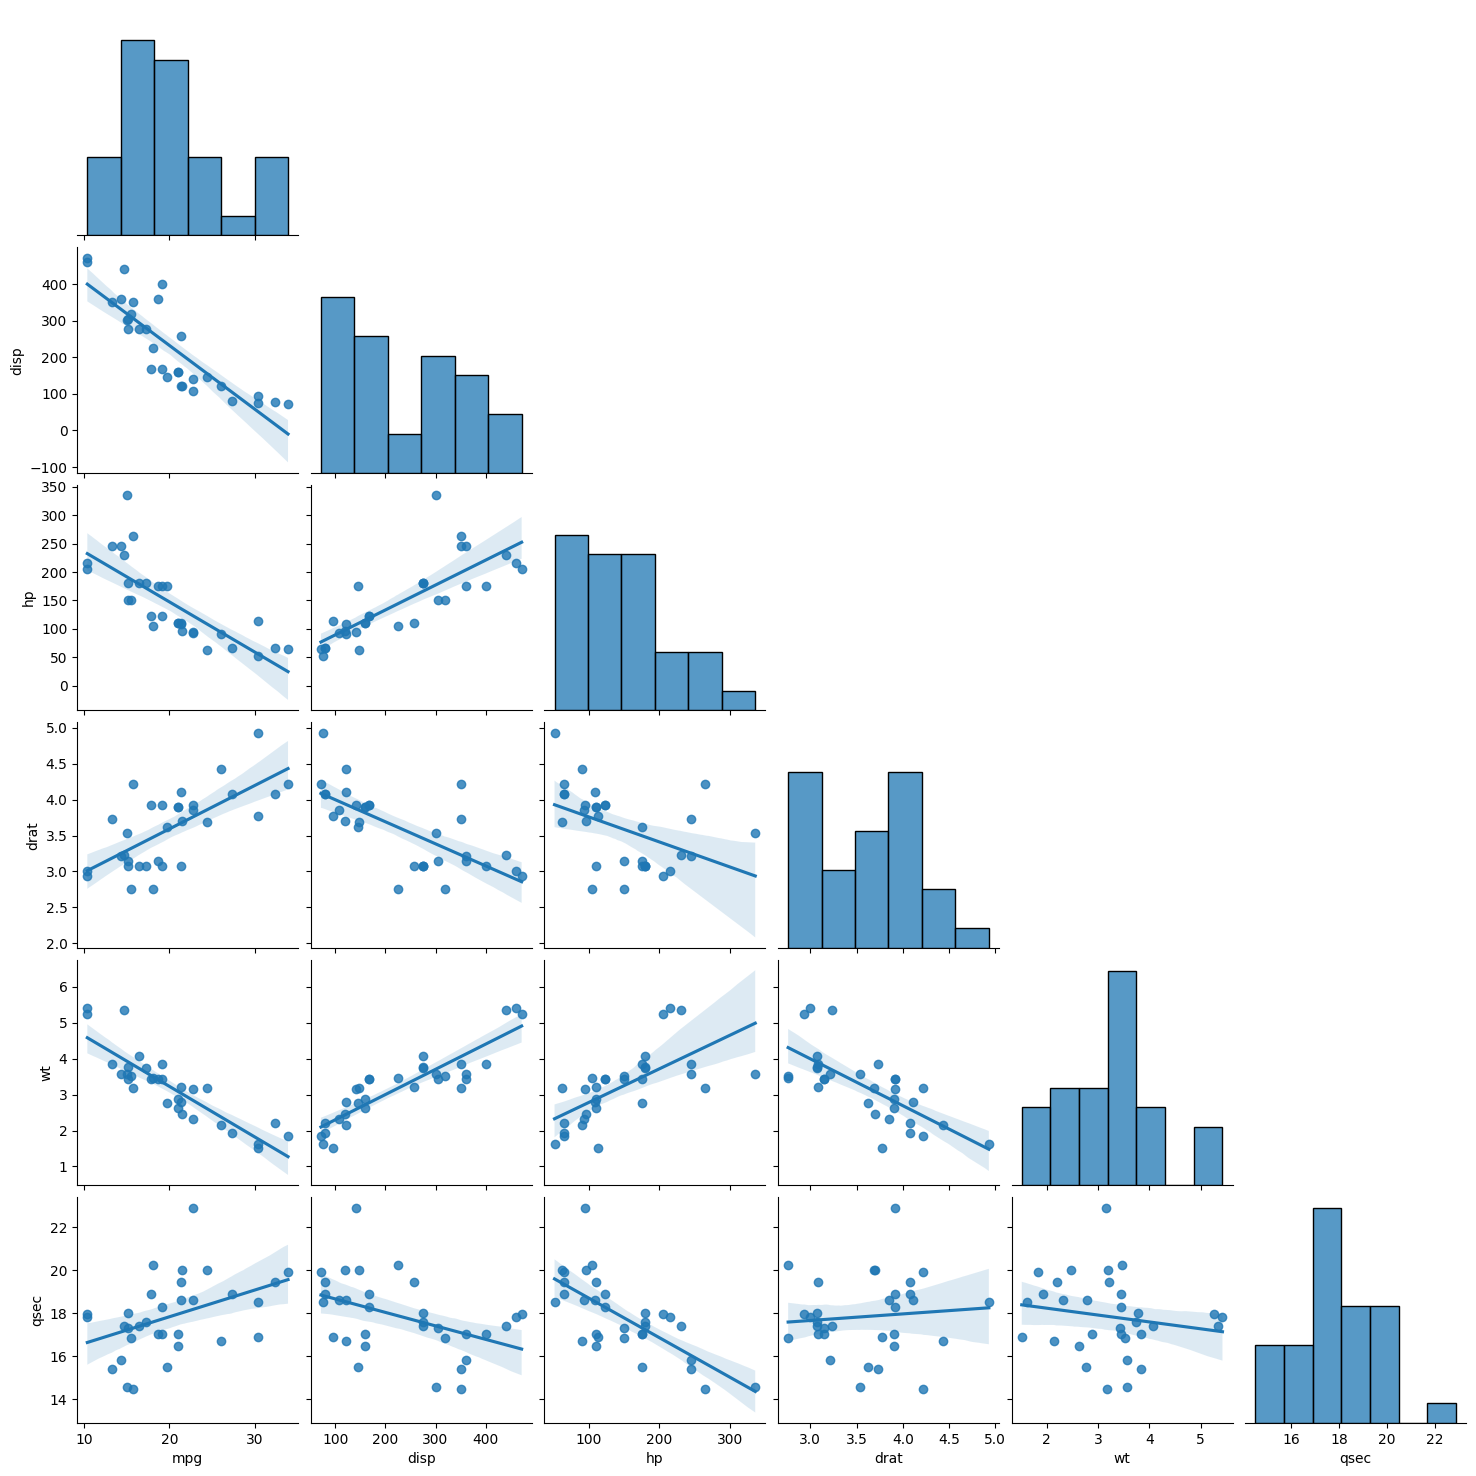

In [ ]:
# Inspeccionamos correlaciones y distribuciones con pairplot

sns.pairplot(data,kind='reg',corner=True)
plt.show()

In [ ]:
# Calculamos correlaciones entre variables numéricas

correlation = data.corr()
correlation

,mpg,disp,hp,drat,wt,qsec
mpg,1.000000,-0.847551,-0.776168,0.681172,-0.867659,0.418684
disp,-0.847551,1.000000,0.790949,-0.710214,0.887980,-0.433698
hp,-0.776168,0.790949,1.000000,-0.448759,0.658748,-0.708223
drat,0.681172,-0.710214,-0.448759,1.000000,-0.712441,0.091205
wt,-0.867659,0.887980,0.658748,-0.712441,1.000000,-0.174716
qsec,0.418684,-0.433698,-0.708223,0.091205,-0.174716,1.000000


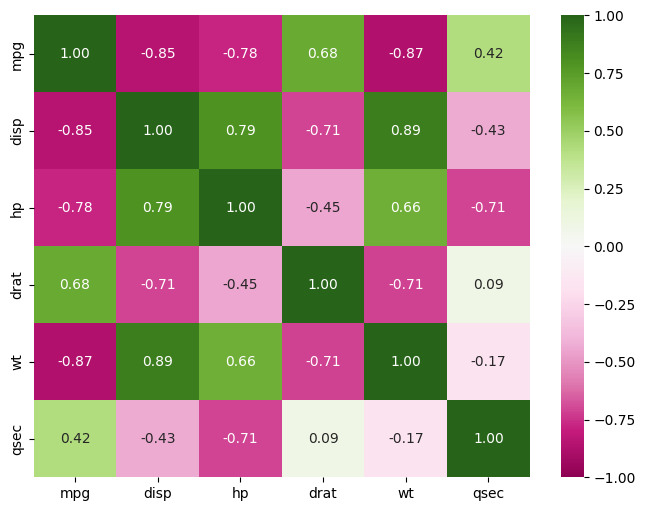

In [ ]:
# Mapa de calor

plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='PiYG')
plt.show()

In [ ]:
# Correlación interesante: "mpg" vs "disp"
# r: -0.85 --> correlación fuerte - inversa

x=data['disp']
y=data['mpg']

**MODELO DE REGRESION LINEAL (STATSMODELS)**

In [ ]:
# Instanciamiento y entrenamiento

x1=sm.add_constant(x)
olsmod=sm.OLS(y,x1).fit()
print(olsmod.summary())   

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           9.38e-10
Time:                        19:48:48   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.5999      1.230     24.070      0.0

In [ ]:
# Gráfico

def plot(x,y,y_pred): 
  plt.scatter(x,y,color='red',label='actual')           
  plt.scatter(x,y_pred,color='blue',label='predicted') 
  plt.plot(x,y_pred)
  plt.xlabel('disp')
  plt.ylabel('mpg')
  plt.legend(loc='upper right')

  plt.show()

In [ ]:
# Predicción

y_pred = olsmod.predict(x1) 

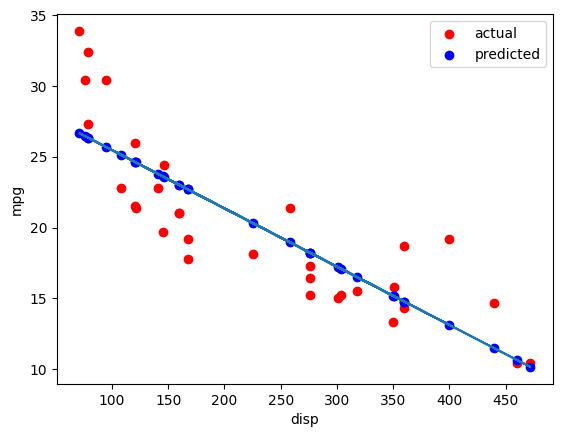

In [ ]:
# Graficamos utilizando método "plot"

plot(x,y,y_pred)

VERIFICACION DE SUPUESTOS EN REGRESION LINEAL

In [ ]:
# 1) RESIDUOS SIN ESTRUCTURA Y MEDIA CERO

In [ ]:
residuals = y - y_pred
print(np.mean(residuals))
print(np.std(residuals))

-1.4210854715202004e-14
3.1482072740002796


In [ ]:
# Promedio de los residuos del modelo
np.mean(olsmod.resid), np.std(olsmod.resid)

(-1.4210854715202004e-14, 3.1482072740002796)

Media de residuos:  -1.4210854715202004e-14


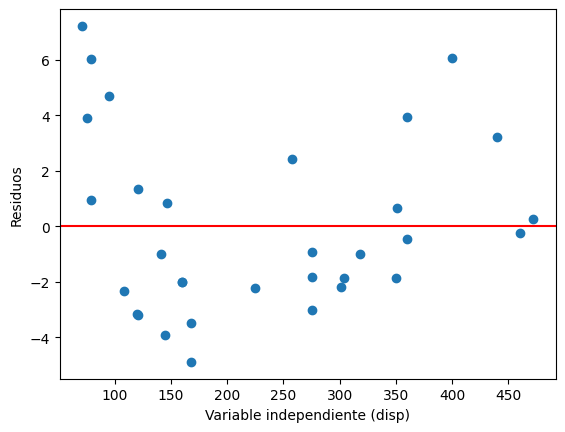

In [ ]:
#   Gráficamos la distribución de los residuos

residuals = y - y_pred
print('Media de residuos: ',np.mean(residuals))

plt.scatter(y=residuals,x=x)
plt.axhline(y=0.0,color='r',linestyle='-')
plt.ylabel('Residuos')
plt.xlabel('Variable independiente (disp)')
plt.show()   

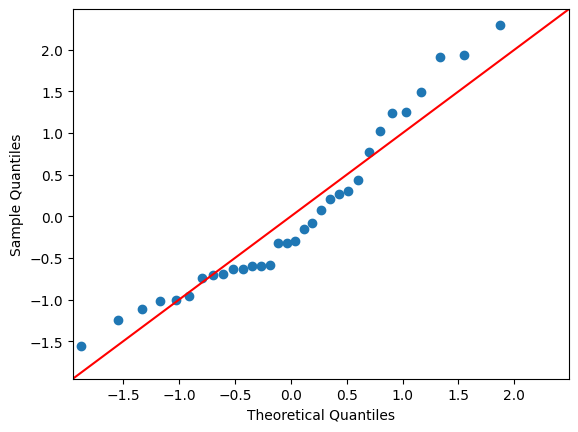

In [ ]:
# Verificamos normalidad de residuos con QQplot

sm.qqplot(olsmod.resid,line='45',fit=True) # por defecto, se compara contra una distribución normal estandar
pylab.show()

In [ ]:
# Test shapiro para la normalidad de los residuos

from scipy.stats import shapiro
shapiro(residuals)

ShapiroResult(statistic=0.9271044197699188, pvalue=0.03254543004216851)

VERIFICAMOS HOMOCEDASTICIDAD

In [ ]:
# Test de breusch - pagan:

names = ['Lagrange multiplier statistic','p-value','f-value','f p-value']
test = smf.het_breuschpagan(olsmod.resid,olsmod.model.exog)
lzip(names,test)

[('Lagrange multiplier statistic', 2.916374783142242),
 ('p-value', 0.08768465766832),
 ('f-value', 3.0082647139722667),
 ('f p-value', 0.09310670540281078)]

VERIFICAMOS AUTOCORRELACION ENTRE RESIDUOS

In [ ]:
# test de durbin - watson:

durbin_watson(olsmod.resid)

1.2503896870866509

MODELO ES SATISFACTORIO.

In [ ]:
# PREDICCION ALEATORIA DE "mpg"

x_new = pd.Series([2.5,2.9])
print('disp values',list(x_new.values))
x1 = sm.add_constant(x_new)
pred = olsmod.predict(x1)
print('predictions of mpg',list(pred))

disp values [2.5, 2.9]
predictions of mpg [29.496816956256996, 29.48033090827188]


**MODELO DE REGRESION LINEAL (SKLEARN)**

In [ ]:
# Instanciamiento y entrenamiento

x_reshaped = x.values.reshape(-1,1)
lr_model = LinearRegression()
lr_model = lr_model.fit(x_reshaped,y)
print('coeficientes:',lr_model.coef_)
print('intercept:',lr_model.intercept_)

y_pred = lr_model.predict(x_reshaped)

# Métricas de performance
r2 = r2_score(y,y_pred)
print('R2=',r2)
mse = mean_squared_error(y,y_pred)
print('RMSE=',np.sqrt(mse))

coeficientes: [-0.04121512]
intercept: 29.599854756163946
R2= 0.7183433404897299
RMSE= 3.1482072740002796


In [ ]:
# Media de la diferencia entre los valores reales y los predichos

np.mean(y-y_pred)

-2.1094237467877974e-15

In [ ]:
# R2 ajustado

def r2_adjusted_score(r2,x,y):
  return 1-(1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)

print("R2adj=",r2_adjusted_score(r2,x_reshaped,y_pred))

R2adj= 0.7089547851727209


In [ ]:
# Predicciones

print('disp values:',list(x_new.values))
x_reshaped = x_new.values.reshape(-1,1)
pred = lr_model.predict(x_reshaped)
print('prediction of mpg',list(pred))

disp values: [2.5, 2.9]
prediction of mpg [29.496816956256982, 29.480330908271867]


OUTLIERS

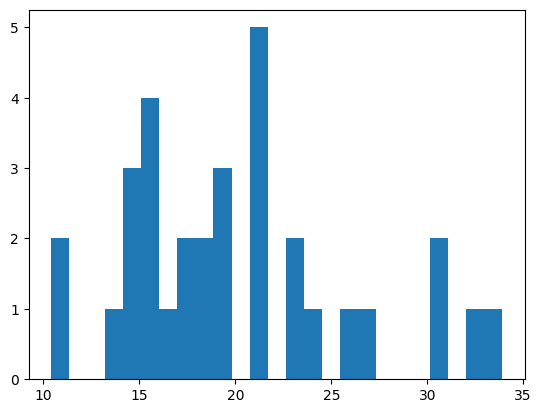

In [ ]:
# Histograma de "mpg"

data['mpg'].hist(bins=25)
plt.grid(False)
plt.show()

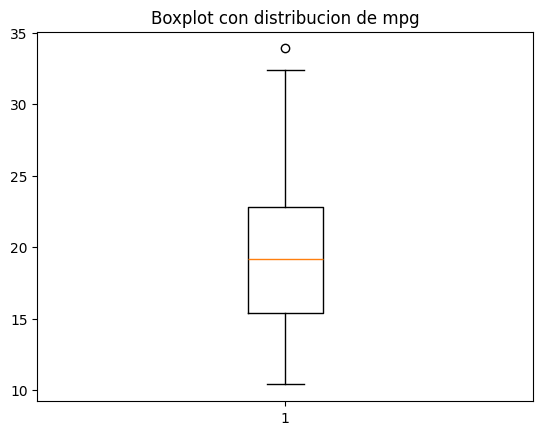

In [ ]:
# Boxplot de "mpg"

plt.boxplot(data['mpg'])
plt.title('Boxplot con distribucion de mpg')
plt.show()

In [ ]:
# Método IQR - Rango intercuartil

print('IQR ====')
percentile25 = data['mpg'].quantile(0.25)
percentile75 = data['mpg'].quantile(0.75)
print('q25=',percentile25,'q75=',percentile75)
iqr = percentile75 - percentile25
print('IQR=',iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('upper:',round(upper_limit,3),'lower:',round(lower_limit,3))

IQR ====
q25= 15.425 q75= 22.8
IQR= 7.375
upper: 33.862 lower: 4.363


In [ ]:
# Método z-score

print('Z-score ====')
upper_limit = data['mpg'].mean() + 2 * data['mpg'].std()
lower_limit = data['mpg'].mean() - 2 * data['mpg'].std()
print('upper:',round(upper_limit,3),'lower:',round(lower_limit,3))

Z-score ====
upper: 32.145 lower: 8.037


In [ ]:
# Cálculo de outliers

mpg_outliers = [x for x in data['mpg'] if x < lower_limit or x > upper_limit]
mpg_outliers


[32.4, 33.9]

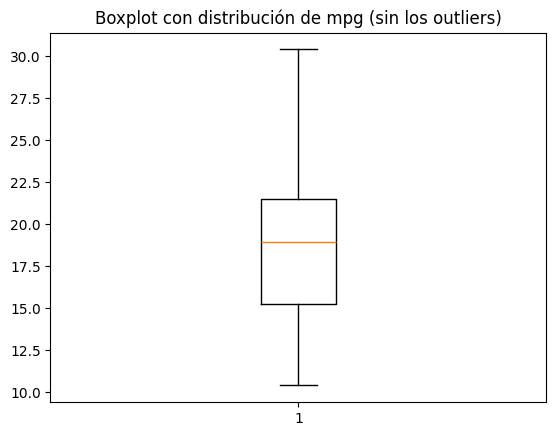

In [ ]:
# Boxplot de "mpg" sin outliers

y_no_outliers = [x for x in y if x not in mpg_outliers]
plt.boxplot(y_no_outliers)
plt.title('Boxplot con distribución de mpg (sin los outliers)')
plt.show()

----------------------------------------------------------------------------------------------------------